In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 21s 2us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

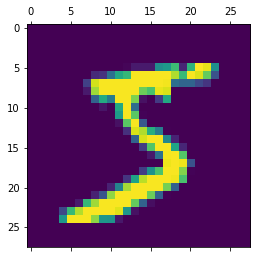

In [8]:
plt.matshow(x_train[0])

#### Normalize training data before training the neural net between 0 and 1

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(256, activation="relu"))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [13]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.2128 - accuracy: 0.9366
Epoch 2/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0903 - accuracy: 0.9719
Epoch 3/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0610 - accuracy: 0.9809
Epoch 4/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0452 - accuracy: 0.9855
Epoch 5/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0356 - accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0285 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0249 - accuracy: 0.9920
Epoch 8/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0188 - accuracy: 0.9937
Epoch 9/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0189 - accuracy: 0.9938
Epoch 10/10
60000/60000 [============

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 103us/step


[0.11092286720488774, 0.9764999747276306]

#### Above shows accuracy score of 97.64%. The first parameter is loss

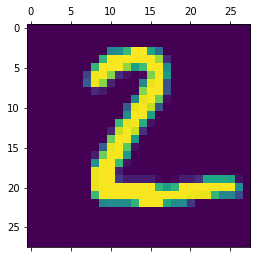

In [27]:
plt.matshow(x_test[1])

In [28]:
yp = model.predict(x_test)

In [29]:
yp[1]

array([1.2964982e-14, 1.6167937e-09, 1.0000000e+00, 1.6783730e-10,
       1.0466546e-19, 6.4298393e-13, 1.2604409e-13, 4.7167045e-13,
       5.9061034e-10, 2.2382815e-18], dtype=float32)

In [30]:
class_labels = ['0','1','2','3','4','5','6','7','8','9']

In [31]:
class_labels[np.argmax(yp[1])]

'2'